# 02 Basic Knowledge

In [1]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
accelerate                    0.25.0
aiohttp                       3.9.1
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.2
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backport

You can use Table of Content to read

## Data Manipulation

In [2]:
import torch

In [3]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([12])

In [5]:
x.numel()

12

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(3, 4)

tensor([[-0.2250,  1.2189,  0.9024, -0.7907],
        [ 0.0333,  0.8126, -0.0473, -0.2897],
        [ 1.4299,  0.5129, -0.8760,  1.9224]])

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## operator

In [11]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y, torch.exp(x) # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]),
 tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03]))

In [12]:
# concatenate more tensor
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [13]:
# Bool check
a = (X == Y)
print(a)
# sum tensor
X.sum()

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])


tensor(66.)

In [14]:
# broadcasting mechanism 廣播機制
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [15]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [16]:
# index and slice
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [17]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
# value by index
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [20]:
## save memory id can use to track before the memory 
before = id(Y)
Y = Y + X
id(Y) == before

False

In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 1502684314528
id(Z): 1502684314528


In [22]:
# if we dont use X later
before = id(X)
X += Y
id(X) == before

True

In [23]:
# Trans obj to the other python obj
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)


(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)


(tensor([3.5000]), 3.5, 3.5, 3)

## Data Preprocessing:

In [25]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 
    f.write('NA,Pave,127500\n') # 
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [26]:
# deal Na
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs
inputs["NumRooms"] = inputs["NumRooms"].fillna(inputs["NumRooms"].mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [27]:
# dummy 
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [28]:
## trans to torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [29]:
# Second sample
# 创建一个包含分类变量的DataFrame
df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red']})

# 使用get_dummies进行哑变量编码（去掉一个维度）
dummy_encoded = pd.get_dummies(df['Color'], prefix='Color', drop_first=True)

# 将哑变量编码后的结果与原始DataFrame连接起来
df_encoded = pd.concat([df, dummy_encoded], axis=1)

print(df_encoded)

   Color  Color_Green  Color_Red
0    Red        False       True
1  Green         True      False
2   Blue        False      False
3    Red        False       True


In [30]:
## One hot Encoding  ## dummy use to do 2 samples, but one hot do more than 2
one_hot_encoded = pd.get_dummies(df['Color'], prefix='Color')
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
print(df_encoded)

   Color  Color_Blue  Color_Green  Color_Red
0    Red       False        False       True
1  Green       False         True      False
2   Blue        True        False      False
3    Red       False        False       True


### Scalar 
means tensor only has 1 element


In [31]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### Vector


In [32]:
x = torch.arange(5)
x

tensor([0, 1, 2, 3, 4])

In [33]:
len(x), x.shape, 

(5, torch.Size([5]))

### Matrix

In [34]:
A = torch.arange(16).reshape(4, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

#### Tranpose and symmetric matrix

In [35]:
A.T

tensor([[ 0,  4,  8, 12],
        [ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15]])

In [36]:
# We can compare symmetric matrix
A == A.T

tensor([[ True, False, False, False],
        [False,  True, False, False],
        [False, False,  True, False],
        [False, False, False,  True]])

### tensor 張量

In [37]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # clone a new one
A, A + B, A * B, A*3

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]),
 tensor([[  0.,   1.,   4.,   9.],
         [ 16.,  25.,  36.,  49.],
         [ 64.,  81., 100., 121.],
         [144., 169., 196., 225.],
         [256., 289., 324., 361.]]),
 tensor([[ 0.,  3.,  6.,  9.],
         [12., 15., 18., 21.],
         [24., 27., 30., 33.],
         [36., 39., 42., 45.],
         [48., 51., 54., 57.]]))

#### dimensionality reduction

In [38]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()


(tensor([0., 1., 2., 3.]), tensor(6.))

In [39]:
## di to axis 0
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [40]:
A.sum(axis=[0, 1]) # same as A.sum(); 0 is row, 1 is col

tensor(190.)

In [41]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [42]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [43]:
# not reduction sum
sum_A = A.sum(axis=1, keepdims=True)
print(sum_A)
A / sum_A


tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])


tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [44]:
# this wont reduct the di
A.cumsum(axis=0)


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

#### Dot Product

In [45]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)


(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [46]:
torch.sum(x * y)

tensor(6.)

In [47]:
## mv use to get the matrix-vector multiplication
A.shape, x.shape, torch.mv(A, x) # we get a new vector

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [48]:
## mm use to get the matrix-matrix multiplication
B = torch.ones(4, 3)
torch.mm(A, B) # we get a new matrix 2x2

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [49]:
# L1 norm, L2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(x, p=1), torch.norm(x, p=2)

(tensor(6.), tensor(3.7417))

In [50]:
#
torch.abs(u).sum()

tensor(7.)

## Calculus

In [51]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

In [52]:
def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [53]:
def use_svg_display(): #@save
    """svg"""
    backend_inline.set_matplotlib_formats('svg')

## figure size
def set_figsize(figsize=(3.5, 2.5)): #@save
    """matplotlib figuresize"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [54]:
## get the figure axis
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set matplotlib Axis"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [55]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点图形"""
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else plt.gca()
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)
        axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
    return axes

def has_one_axis(X):
    """判断数据是否有一个轴"""
    return hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__")


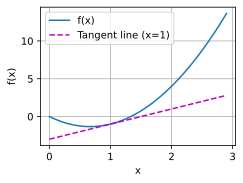

In [56]:
# 重新定义完成后的绘图代码
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])
plt.show()


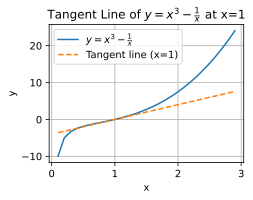

In [57]:
# 定义函数 y = x^3 - 1/x
def f2(x):
    return x**3 - 1/x

# 定义函数 y = x^3 - 1/x 的导数
def f2_prime(x):
    return 3*x**2 + 1/x**2

# 定义切线的方程，给定点 (x0, y0) 和斜率 slope
def tangent_line(x0, y0, slope):
    return slope * (x - x0) + y0

# 设置 x 的范围
x = np.arange(0.1, 3, 0.1)

# 计算函数值和导数值
y = f2(x)
slope = f2_prime(1)

# 绘制函数曲线
plt.plot(x, y, label='$y=x^3 - \\frac{1}{x}$')

# 绘制切线
plt.plot(x, tangent_line(1, f2(1), slope), '--', label='Tangent line (x=1)')

# 设置图例、坐标轴标签等
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangent Line of $y=x^3 - \\frac{1}{x}$ at x=1')
plt.grid(True)

# 显示图形
plt.show()

### automatic differentiation

In [58]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [59]:
x.requires_grad_(True) # same as x=torch.arange(4.0,requires_grad=True)
x.grad # defauklt is None
print(x.grad)

None


In [60]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [61]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [62]:
# the gradient of 2x**T * x should be 4x
# Lets check
x.grad == 4 * x

tensor([True, True, True, True])

In [63]:
# in default, Pytorch will accumlate the gradient, so we need to clean the grad
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [64]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad


tensor([0., 2., 4., 6.])

### non-scalar backward


In [65]:
x.grad.zero_()
y = x * x
# sane as y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [66]:
x.grad.zero_()
y = x * x
u = y.detach() # create new tensor u which wont be influenced by y
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [67]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### control gradient 

In [68]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
        print(b)
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    print("C:",c)
    return c
    
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor(-4.2885, grad_fn=<MulBackward0>)
tensor(-8.5771, grad_fn=<MulBackward0>)
tensor(-17.1542, grad_fn=<MulBackward0>)
tensor(-34.3083, grad_fn=<MulBackward0>)
tensor(-68.6167, grad_fn=<MulBackward0>)
tensor(-137.2334, grad_fn=<MulBackward0>)
tensor(-274.4668, grad_fn=<MulBackward0>)
tensor(-548.9336, grad_fn=<MulBackward0>)
tensor(-1097.8672, grad_fn=<MulBackward0>)
C: tensor(-109786.7188, grad_fn=<MulBackward0>)


tensor(True)

## Probability

In [89]:
# %matplotlib inline
import torch
from torch.distributions import multinomial



In [90]:
fair_probs = torch.ones([6]) / 6
fair_probs, multinomial.Multinomial(1, fair_probs).sample()

(tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]),
 tensor([0., 1., 0., 0., 0., 0.]))

In [91]:
multinomial.Multinomial(10, fair_probs).sample() ## means we take a sample 10 times to toll a dice,

tensor([3., 1., 3., 0., 2., 1.])

In [92]:
## if we need to do 1000 samples, if we use python loop to do it, it will very slow.
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 

tensor([0.1550, 0.1600, 0.1610, 0.1750, 0.1750, 0.1740])

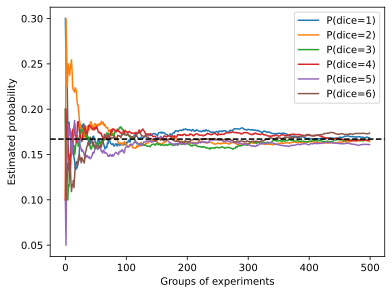

In [93]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)

estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
    label=("P(dice=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();
plt.show()